In [65]:
# data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# ignore warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [99]:
data = pd.read_csv ('C:/Users/estel/Documents/Masters/Big Data Health/Project/CheXpert-v1.0-small/train.csv')

In [107]:
data=data.fillna(0)

In [125]:
patients=[]
for patient in data.Path.values:
    patients.append(patient.split('/')[2])

In [126]:
data['patient_ID']=patients

In [192]:
ages = data.groupby('patient_ID')['Age'].max()

In [193]:
ages.head()

patient_ID
patient00001    68
patient00002    87
patient00003    41
patient00004    20
patient00005    33
Name: Age, dtype: int64

In [138]:
data.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,patient_ID
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,patient00001
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0,patient00002
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,patient00002
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,patient00002
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00003


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
Path                          223414 non-null object
Sex                           223414 non-null object
Age                           223414 non-null int64
Frontal/Lateral               223414 non-null object
AP/PA                         191027 non-null object
No Finding                    22381 non-null float64
Enlarged Cardiomediastinum    44839 non-null float64
Cardiomegaly                  46203 non-null float64
Lung Opacity                  117778 non-null float64
Lung Lesion                   11944 non-null float64
Edema                         85956 non-null float64
Consolidation                 70622 non-null float64
Pneumonia                     27608 non-null float64
Atelectasis                   68443 non-null float64
Pneumothorax                  78934 non-null float64
Pleural Effusion              133211 non-null float64
Pleural Other                 6492 non-n

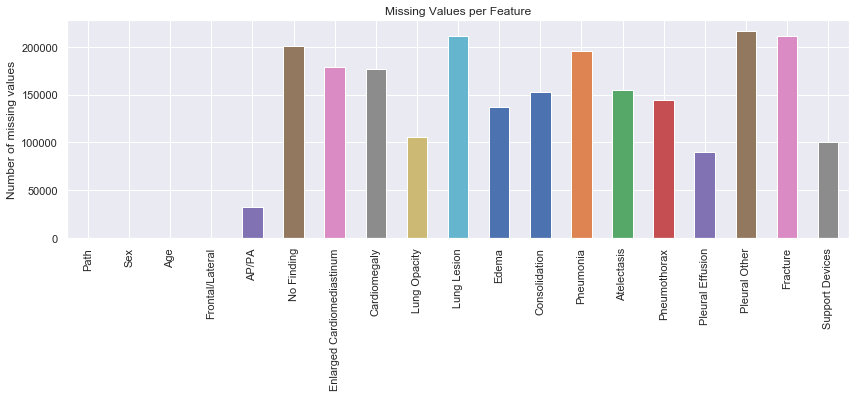

In [82]:
#the amount of missing values per feature
sns.set(rc={'figure.figsize':(14,4)})
pd.isnull(data).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature');

In [83]:
#This is age distribution of the visits (not patients). 
data.Age.describe()

count    223414.000000
mean         60.430653
std          17.820925
min           0.000000
25%          49.000000
50%          62.000000
75%          74.000000
max          90.000000
Name: Age, dtype: float64

In [139]:
#This is the distribution of ages per patients.
ages.describe()

count    64540.000000
mean        60.580043
std         18.614720
min          0.000000
25%         48.000000
50%         62.000000
75%         75.000000
max         90.000000
Name: Age, dtype: float64

In [133]:
#The most common (Top 10) ages of the patients 
ages.value_counts()[:10]

90    2907
57    1344
66    1334
61    1320
64    1314
65    1309
67    1292
58    1281
60    1276
59    1275
Name: Age, dtype: int64

In [136]:
#The least common ages (least 5) of the patients
ages.value_counts()[-5:]

20    402
26    384
19    366
18    293
0       3
Name: Age, dtype: int64

In [84]:
#The age distribution of the visits (Top 10)
data.Age.value_counts()[:10]

90    7579
61    5372
65    5098
66    5098
58    5075
64    5033
57    4902
60    4843
59    4813
67    4742
Name: Age, dtype: int64

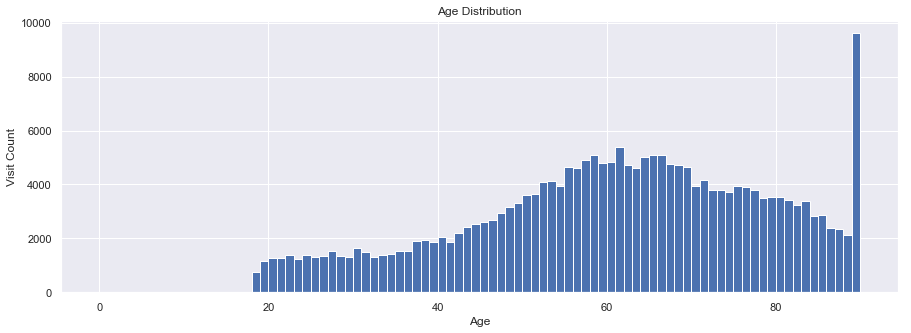

In [141]:
# The age distribution per visits (bot per patients)
sns.set(rc={'figure.figsize':(15,5)})
plt.hist(data.Age, bins=90)
plt.xlabel('Age')
plt.ylabel('Visit Count')
plt.title('Age Distribution');

The maximum and the most frequent age of patients is 90. After 90, the most common(top 10) ages are 61,65,66,58,64,57,60,59 and 67 The average age is 60. There are 3 patients with the age of 0 and besides those the minimum age of patients is 18 (766 patients)

Based on this distribution it looks like age is a factor on our results. 

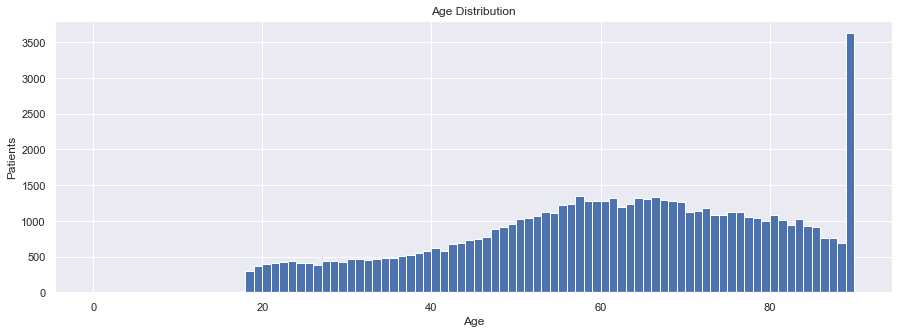

In [142]:
# The age distribution of the patients
sns.set(rc={'figure.figsize':(15,5)})
plt.hist(ages, bins=90)
plt.xlabel('Age')
plt.ylabel('Patients')
plt.title('Age Distribution');

In [86]:
data[data.Age==0]

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0
223413,CheXpert-v1.0-small/train/patient64540/study1/...,Female,0,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


These are the data belonging to patients with age 0. The images of the patients are not clear to have an idea about the age of the patient. Looks like they're not outliers and need to be kept.

In [143]:
genders = data.groupby('patient_ID')['Sex'].last()

In [147]:
genders.head()

patient_ID
patient00001    Female
patient00002    Female
patient00003      Male
patient00004    Female
patient00005      Male
Name: Sex, dtype: object

In [145]:
genders.describe()

count     64540
unique        3
top        Male
freq      35811
Name: Sex, dtype: object

In [146]:
genders.value_counts()

Male       35811
Female     28728
Unknown        1
Name: Sex, dtype: int64

In [164]:
patient_list = pd.DataFrame(patients).drop_duplicates()

In [165]:
len(patient_list)

64540

In [167]:
patient_list['gender']= genders

There are 64540 patients within our dataset.
35811 of them are Male, 
28728 of them are Female 
and 1 is with unknown gender

In [176]:
data.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,patient_ID
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,patient00001
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0,patient00002
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,patient00002
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,patient00002
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00003


In [194]:
ages = ages.to_frame()

In [196]:
ages.head()

,Age
patient_ID,
patient00001,68
patient00002,87
patient00003,41
patient00004,20
patient00005,33


In [200]:
genders_dict = genders.to_frame().to_dict()

In [201]:
ages_dict = ages.to_dict()

In [206]:
ages= ages.reset_index()

In [214]:
ages['gender']=ages['patient_ID'].map(genders_dict['Sex'])

In [215]:
ages.head()

,patient_ID,Age,gender
0,patient00001,68,Female
1,patient00002,87,Female
2,patient00003,41,Male
3,patient00004,20,Female
4,patient00005,33,Male


In [216]:
len(ages)

64540

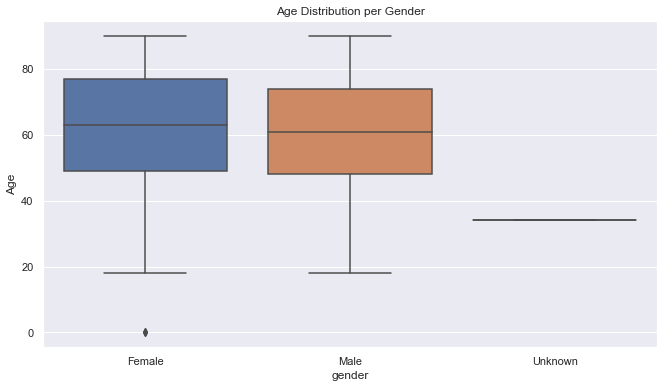

In [217]:
sns.set(rc={'figure.figsize':(11,6)})
sns.boxplot(x = 'gender', y = 'Age', data = ages)
plt.title('Age Distribution per Gender');

There are more male patients within our data set but looks like there's no significant difference between the distribution of the ages per gender.

In [222]:
image_per_patient = data.groupby('patient_ID')['Path'].count()

''

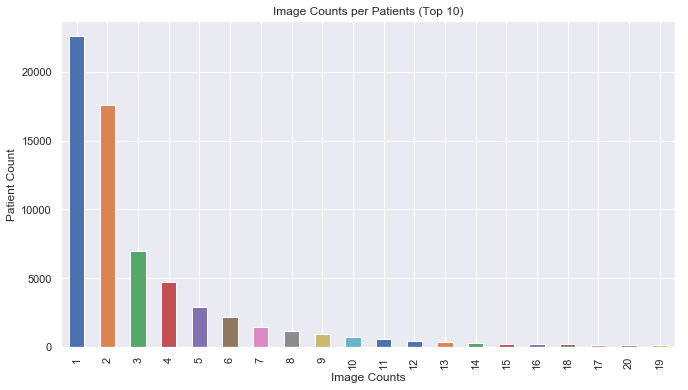

In [235]:
image_per_patient.value_counts()[:20].plot(kind='bar')
plt.xlabel('Image Counts')
plt.ylabel('Patient Count')
plt.title('Image Counts per Patients (Top 10)')
;

Most of the patients has 1 images. And the distribution is showing less values sequentially till 17.

In [262]:
image_per_patient.value_counts()[:20]

1     22581
2     17547
3      6965
4      4685
5      2910
6      2154
7      1414
8      1168
9       909
10      685
11      555
12      432
13      351
14      301
15      245
16      198
18      176
17      152
20      130
19      125
Name: Path, dtype: int64

In [261]:
image_per_patient.describe()

count    64540.000000
mean         3.461636
std          4.659706
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         92.000000
Name: Path, dtype: float64

The average number of images per patient is 3.46. The maximum number of images per one patient is 92. The graph below is also showing the patients with the most number of images.

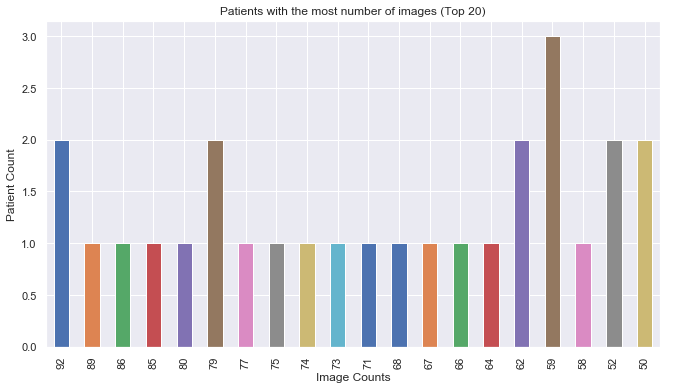

In [263]:
image_per_patient.value_counts()[-20:].sort_index(ascending=False).plot(kind='bar')
plt.xlabel('Image Counts')
plt.ylabel('Patient Count')
plt.title('Patients with the most number of images (Top 20)');

In [246]:
data['Frontal/Lateral'].value_counts()

Frontal    191027
Lateral     32387
Name: Frontal/Lateral, dtype: int64

There are around 32K (14.5%) lateral and 19K (85.5%) frontal images.

In [91]:
data['No Finding'].value_counts()

1.0    22381
Name: No Finding, dtype: int64

In [92]:
#data['No Finding']=data['No Finding'].fillna(0)

In [93]:
data['No Finding'].value_counts()

0.0    201033
1.0     22381
Name: No Finding, dtype: int64

There are 22K (10%) patients with "No Findings". All others (90%) have value of NaN. We replaced them with 0 (zero).

In [95]:
data = data.fillna(0)

In [278]:
data.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,patient_ID
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,patient00001
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0,patient00002
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,patient00002
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,patient00002
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00003


In [281]:
#Imputing non-numeric values with numeric in order to calculate the correlation between the features
data.Sex = np.where(data.Sex=='Female', 2,1)

In [286]:
data.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,patient_ID
0,CheXpert-v1.0-small/train/patient00001/study1/...,2,68,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,patient00001
1,CheXpert-v1.0-small/train/patient00002/study2/...,2,87,1,1,0.0,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0,patient00002
2,CheXpert-v1.0-small/train/patient00002/study1/...,2,83,1,1,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,patient00002
3,CheXpert-v1.0-small/train/patient00002/study1/...,2,83,2,2,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,patient00002
4,CheXpert-v1.0-small/train/patient00003/study1/...,1,41,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient00003


In [283]:
data['Frontal/Lateral'] = np.where(data['Frontal/Lateral']=='Frontal', 1,2)

In [284]:
data['AP/PA'] = np.where(data['AP/PA']=='AP', 1,2)

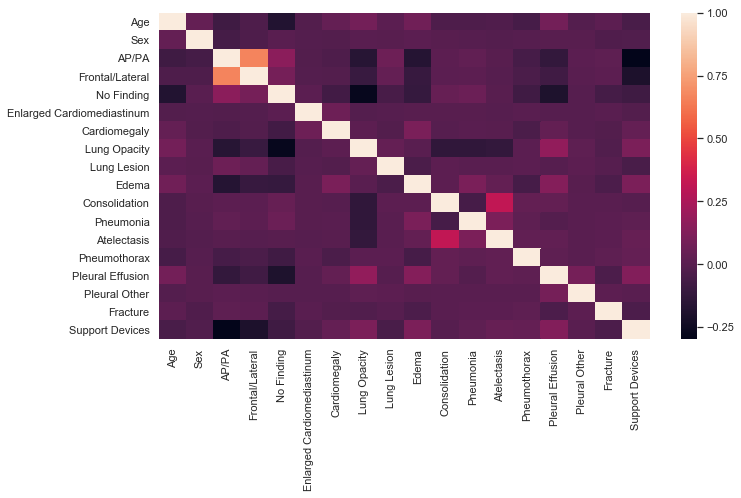

In [287]:
corr = data[['Age','Sex','AP/PA', 'Frontal/Lateral','No Finding','Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

Based on the correlation matrix we can say there's no correlation between most features. Atelectasis&Consolidation are the most correlated features. Expecially the age, gender, AP/PA are not effecting the features significantly.